In [6]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling

from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.datasets import fetch_openml

from sklearn.decomposition import PCA

# Cargando los Datos (Dataset Razas de Perros)

In [8]:
#se cargan los archivos hacia datasets de numpy
images_inception_features = './pre-processing/training_inception_features_array.npy'
training_image_labels_array = './pre-processing/training_image_labels_array.npy'
training_image_names_array = './pre-processing/training_image_names_array.npy'

TRAIN_DICTIONARY_KEYS = ["images", "label","features"]

training_set_dict = dict()
    
training_set_dict['images_name'] = np.load(training_image_names_array)
training_set_dict['label'] = np.load(training_image_labels_array)
training_set_dict['features'] = np.load(images_inception_features)


## Cargamos las features y las labes de cada feature
features = training_set_dict['features']
labels = training_set_dict['label']
images_name = training_set_dict['images_name']

In [15]:
#### PCA a 2 dimensiones ######
x = features
pca = PCA(n_components=2)
pca.fit(features)

X2D = pca.fit_transform(features)#new features matrix

In [16]:
print(x.shape)
print(X2D.shape)

(10222, 2048)
(10222, 2)


Text(0, 0.5, 'component 2')

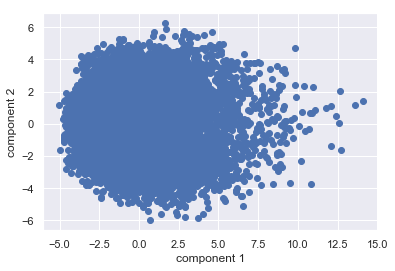

In [13]:
plt.scatter(X2D[:, 0], X2D[:, 1])
plt.xlabel('component 1')
plt.ylabel('component 2')


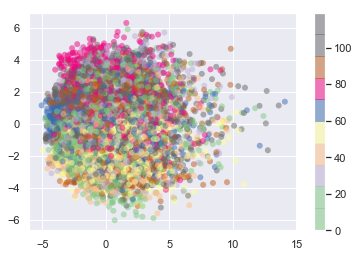

In [26]:
#se codifican los labels para hacer el clustering
from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()
training_set_dict["code"] = lb_make.fit_transform(training_set_dict['label'])

plt.scatter(X2D[:, 0], X2D[:, 1],
            c=training_set_dict["code"] , edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('Accent', 10))
plt.colorbar()

## K-means Clustering con Sklearn

[Documentacion oficial](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)

In [29]:
## K-means
# create dataset
X, y = make_blobs(
   n_samples=150, n_features=2,
   centers=3, cluster_std=0.5,
   shuffle=True, random_state=0
)

# plot
plt.scatter(
   X[:, 0], X[:, 1],
   c='white', marker='o',
   edgecolor='black', s=50
)
plt.show()



In [29]:
clusters = 10 ## clustes de kmeans

kmeans = KMeans(
    n_clusters=clusters, init='random',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0
)
kmeans.fit_predict(features)



array([1, 0, 7, ..., 9, 0, 7])

In [30]:
kmeans.cluster_centers_.shape

(10, 2048)

In [33]:
centers=kmeans.cluster_centers_

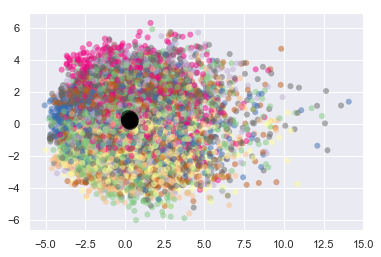

In [34]:
plt.scatter(X2D[:, 0], X2D[:, 1],
            c=training_set_dict["code"], edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('Accent', 10))
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);
